<a href="https://colab.research.google.com/github/guangyitan/Udemy-Unsupervised-Machine-Learning-with-2-Capstone-ML-Projects/blob/main/Dimensionality%20Reduction/Introduction_to_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mount to google drive
from google.colab import drive 
drive.mount('/content/MyDrive')
project_path = '/content/MyDrive/My Drive/Colab Notebooks/Udemy/Dimensionality Reduction/'

#read the excel file
data = pd.read_csv(project_path + "Employee_Data.csv")
data.shape

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


(1470, 35)

In [3]:
# Visualise the dataset

# set num of columns to display
pd.set_option('max_columns', 35)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Removing Usless Columns

In [4]:
# look for useless columns

print("Number of Records in the Dataset: ", data.shape[0])
print("Number of Unique Values in EmployeeCount Column: ", data['EmployeeCount'].nunique())
print("Number of Unique Values in EmployeeNumber Column: ", data['EmployeeNumber'].nunique())
print("Number of Unique Values in Over18 Column: ", data['Over18'].nunique())
print("Number of Unique Values in StandardHours Column: ", data['StandardHours'].nunique())


Number of Records in the Dataset:  1470
Number of Unique Values in EmployeeCount Column:  1
Number of Unique Values in EmployeeNumber Column:  1470
Number of Unique Values in Over18 Column:  1
Number of Unique Values in StandardHours Column:  1


For EmployeeNumber Column, each row has unique values in all records.

For EmployeeCount, Over18 and StandardHours Columns, they have only one unique value in all records.

These columns are useless as they do not have any trends or patterns which can be used for predictive analytics.

In [5]:
# remove the useless columns from the dataset

data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1)
print("Number of Columns left: ", data.shape[1])

Number of Columns left:  31


In [6]:
# check for Missing values in the dataset
data.isnull().sum().sum()

0

There are no null/ missing values in the dataset

In [7]:
# check for columns with Object Data Type
data.select_dtypes('object').head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


# Encode Object Type Data into Numerical Type Data

In [8]:
# Encode the Object Type data into Numerical Data Type
# Attrition Column is excluded as it is our Target Column
# For Attrition Column, if 'Yes', employee will leave the organization in near future
# For Attrition Column, if 'NO', employee will not leave the organization in near future

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

# double check to ensure all object data type are converted
data.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [9]:
# Split dataset into x and y

# axis = 0 means along row
# axis = 1 means along column
x = data.drop(['Attrition'], axis = 1)
y = pd.DataFrame(data['Attrition'], columns = ['Attrition'])

print("shape of x", x.shape)
print("shape of y", y.shape)

shape of x (1470, 30)
shape of y (1470, 1)


# Balancing the dataset using 'SMOTEENN' sampling technique

In [10]:
# check if the dataset is balance or not 
# check on the target column which is 'Attrition' Column

data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

From above we can see that the dataset has very large imbalance for **No** and **Yes** records

In [11]:
# balance the dataset distribution using 'SMOTEENN' Sampling Technique

from imblearn.combine import SMOTEENN

# defining the model
sn = SMOTEENN(random_state = 0)

# train the model
sn.fit(x, y)

# Making the samples
x, y = sn.fit_sample(x, y)

#convert y from ndarray to dataframe
y = pd.DataFrame(y, columns = ['Attrition'])

# Distribution of the dataset
y.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

Attrition
Yes          838
No           640
dtype: int64

# Splitting the Dataset into Testing and Training

In [12]:
# splitting the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape x_train: ", x_train.shape)
print("Shape x_test: ", x_test.shape)
print("Shape y_train: ", y_train.shape)
print("Shape y_test: ", y_test.shape)

Shape x_train:  (1182, 30)
Shape x_test:  (296, 30)
Shape y_train:  (1182, 1)
Shape y_test:  (296, 1)


# Decision Tree Classification Model

In [13]:
# Train a Decision Tree Classification Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

          No       0.80      0.87      0.84       127
         Yes       0.90      0.84      0.87       169

    accuracy                           0.85       296
   macro avg       0.85      0.86      0.85       296
weighted avg       0.86      0.85      0.86       296



Although the model has high recall and precision, we have to be aware that overfitting may had occured as there are many columns / features.

Thus, we have to perform dimensionality reduction to **avoid overfitting and reduce time & space complexity of our model.**

# Correlation Filtering using HeatMap

Correlation is a statistical relationship between two variable. In broadest sense, it refers to the degree to which, a pair of variables are linearly related.


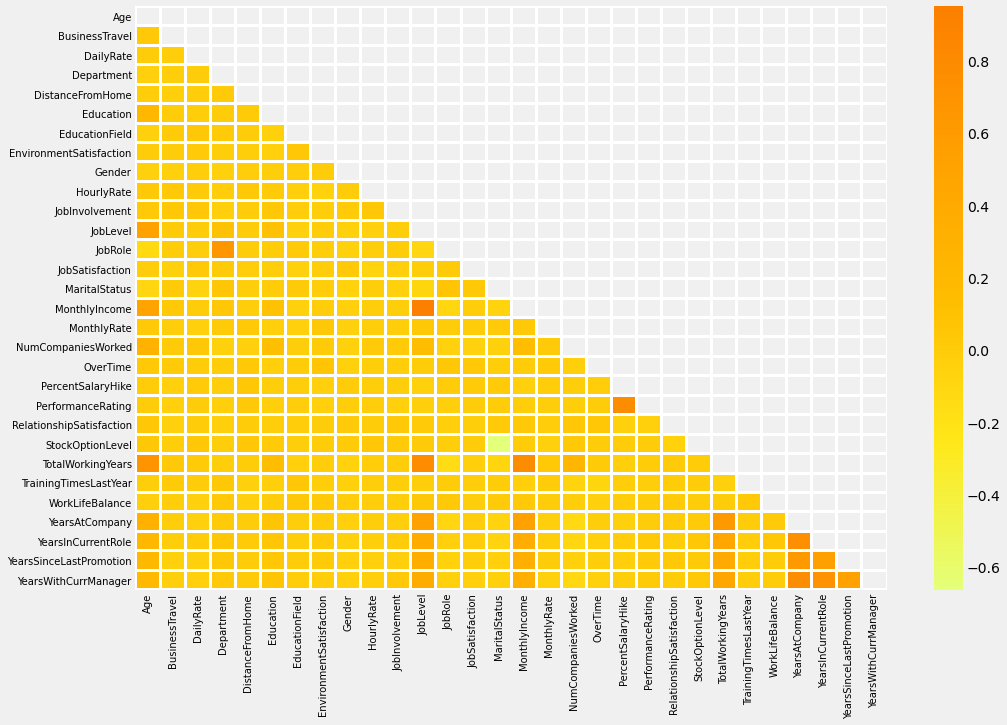

In [14]:
plt.rcParams['figure.figsize'] = (15,10)
plt.style.use('fivethirtyeight')

# calclulate correlation
corr = data.corr()

# np.triu is used to create a mask to only display the lower triangle of the heat map
mask = np.triu(np.ones_like(corr, dtype = bool))

# cmap = 'Wistia' is usesd to define a yellow color column map
# linewidths = 2 is the width of the line to seperate each cell
sns.heatmap(corr, mask = mask, cmap = 'Wistia', linewidths = 2)

# define font size of labels 
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [15]:
corr

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,0.024287,0.026528,0.023381,-0.004144,0.031131,0.016775,-0.021941,-0.049857,-0.000478,1.000000,0.042861,-0.027853,-0.018861,-0.071335,-0.017861,-0.015794,-0.015297,0.022157,-0.007782,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123


Based on the Heat Map above:

**Age** is highly correlated with JobLevel, **MonthlyIncome** and TotalWorkingYears

JobRole and **Department** are highly correlated

JobLevel is highly correlated with **TotalWorkingHours** and MonthlyIncome

**PerformanceRating** and PercentSalaryHike are highly correlated

YearsInCurrentRole is highly correlated with **YearsAtCompany** and YearsWithCurrManager 

In [16]:
# remove the highly correlated columns from the dataset

data_cf = data.drop(['JobRole', 'JobLevel', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis = 1)
data_cf.shape

(1470, 25)

In [17]:
# Split dataset into x_cf and y_cf

x_cf = data.drop(['Attrition'], axis = 1)
y_cf = pd.DataFrame(data['Attrition'], columns = ['Attrition'])

print("shape of x", x.shape)
print("shape of y", y.shape)

shape of x (1478, 30)
shape of y (1478, 1)


In [18]:
# check if the dataset is balance or not 
# check on the target column which is 'Attrition' Column
y_cf.value_counts()

Attrition
No           1233
Yes           237
dtype: int64

In [19]:
# balance the dataset distribution using 'SMOTEENN' Sampling Technique

from imblearn.combine import SMOTEENN

# defining the model
sn = SMOTEENN(random_state = 0)

# train the model
sn.fit(x_cf, y_cf)

# Making the samples
x_cf, y_cf = sn.fit_sample(x_cf, y_cf)

#convert y from ndarray to dataframe
y_cf = pd.DataFrame(y_cf, columns = ['Attrition'])

# Distribution of the dataset
y_cf.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, 

Attrition
Yes          838
No           640
dtype: int64

In [20]:
# splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

x_train_cf, x_test_cf, y_train_cf, y_test_cf = train_test_split(x_cf, y_cf, test_size = 0.2, random_state = 0)

print("Shape x_train: ", x_train_cf.shape)
print("Shape x_test: ", x_test_cf.shape)
print("Shape y_train: ", y_train_cf.shape)
print("Shape y_test: ", y_test_cf.shape)

Shape x_train:  (1182, 30)
Shape x_test:  (296, 30)
Shape y_train:  (1182, 1)
Shape y_test:  (296, 1)


In [22]:
# Train a Decision Tree Classification Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(x_train_cf, y_train_cf)
y_pred_cf = model.predict(x_test_cf)

cr_cf = classification_report(y_pred_cf, y_test_cf)
print(cr_cf)

              precision    recall  f1-score   support

          No       0.81      0.89      0.85       126
         Yes       0.91      0.85      0.88       170

    accuracy                           0.86       296
   macro avg       0.86      0.87      0.86       296
weighted avg       0.87      0.86      0.87       296

